# Logistic Regression

- Logistic regression is a classification algorithm, don’t confuse with the name regression. 
- Logistic Regression is basically Supervised ML algorithm that is used for __binary classification__
- In classification problem the values we predict take on only a small number of discrete values. For example, "yes or no", "cat or dog", "cat or dog or bird", etc.
- In logistic regression we estimate the probability of a certain discrete value.
- Our main goal is to __predict the probability of the discrete class labels__

Some examples of classification problems:
1. Spam detection
2. Detection of fraudulent transanctions
3. Malignant/Benign tumor

### Hypothesis for classification problem

In classification problem we want the probability of the outcomes. So we would like f(x) to be between 0 and 1.

\begin{equation}
0 
\leq 
f_\theta(x) 
\leq 
1
\end{equation}

* Mathematically, in Linear Regression __hypothesis function $f_{\theta}(x)$ can be >1 or <0__


* For Logistic Regression we need __hypothesis function which can satisfy the math rule:__ $0 \leq f_{\theta}(x)\leq 1$

#### Sigmoid function 

Sigmoid function is used to restrict the f(x) between 0 and 1. Sigmoid function is given below:

$$\sigma(x)=\frac{1}{1+e^{-x}}$$

**Remark:** The derivative of logistic function can be written $\text{d}\sigma = \sigma (1-\sigma)$.

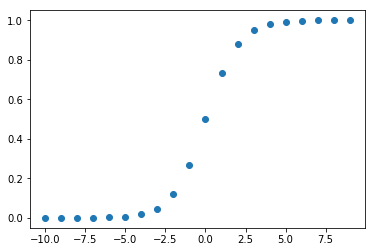

In [2]:
'''Explore the signature of sigmoid function'''
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

def sigmoid(x):
     y = 1 / (1 + np.exp(-x))
     return y

xdata = np.arange(-10, 10)
ydata = sigmoid(xdata)

plt.plot(xdata, ydata, 'o')
plt.show()

### Why do we need sigmoid function?


* This function will give us the __output value between [0,1]__

  


* When you __perform derivative of $e^{x}$ it gives you back $e^{x}$ and this function is the only known 
  differentiable function with this mathematical property. That makes it more convenient for calculation.__


__Assumption of Logistic Regression:__ 

* Input space can be __separated into two nice ‘regions’, one for each class, by a defined boundary.__



* Your data must be linearly separable in __n dimensions__

<img src="../images/Image_1_7.png" align="middle" alt="Image_1_7" data-canonical-src="" style="width:40%;height:40%">

### Intuitive Example to understand math behind LR

__Example / Problem statement: __

* We are provided a sample of 100 customers. 


* We need to predict the probability whether a customer will buy (y) a particular magazine or not based on their 
  age


* As you can see, we’ve a categorical outcome variable, we’ll use logistic regression.

#### Step 1:

To start with logistic regression, I’ll first write the simple linear regression equation with dependent variable

$$ \large Y = mx + C ------ (1) $$

Here,
   * Y = dependent variable ( user buy magazine or not)
   * m = slop
   * x  = independent variable ( Here I will take age of the readers for make it simple)
   * C = Y-intercept

#### Step 2:

So, final equation form based on our example will be

$$ \large Y_{readers\;will\;buy\; magazine\; or\; not}  = m * x_{age} + C ------(2)$$


* Now consider Y as function of probability. Why? because we need the chance (probability of the whether buyer will buy the magazine or not)


* This function is established using two things: 
  * Probability of Success(p) means reader buys magazine 
  * Probability of Failure(1-p) means reader doesn't buy magazine.
  
* Probability p should meet following criteria:
    1. It must always be positive (since p >= 0)
    2. It must always be less than equals to 1 (since p <= 1)
 


#### Step 3:

__Since probability must always be positive, we’ll put the linear equation in exponential form.__
For any value of slope and dependent variable, exponent of this equation will never be negative.


$$ \large p = exp(C + mx_{Age}) = e^{(C + mx_{Age})}    ------- (3) $$ 

Here,

* P  =  Probability of readers' buy magazine or not
* exp OR e =  exponential symbol OR Euler's number.


#### Step 4:

To make the probability less than 1, we must divide p by a number greater than p. This can simply be done by:

$$ \large p  =  \frac{exp(C + mx_{Age})}{exp(C + mx_{Age}) + 1}   =  \frac{ e^{(C + mx_{Age})}}{e^{(C + mx_{Age})} + 1 }   ----- (4)$$

#### Step 5:

Now by using equation 1, 2, 3 and 4 we can redefine the probability as:

 $$ p = \frac {e^{Y}}{ 1 + e^{Y}} ----- (5)$$ 
 
 * Here we have just __substitute the C + mx{Age} with Y__
 
 
 * Here p is the probability of success. This __Equation (5) is the Logit Function__

```

```


If p is the probability of success, 1-p will be the probability of failure which can be written as:

$$q = 1 - p = 1 - \frac {e^{Y}}{ 1 + e^{Y}}    --- (6)$$

* Here q is the probability of failure

#### Step 6:

Now let's __divide the equation 5 and 6__ so that we get following equation


$$ \frac {p}{1-p} = e^{Y}    --- (7)$$

#### Step 7: 

After __taking log on both side__, So that we can get the value of Y

$$ \large log(\frac{p}{1-p}) = Y    --- (8) $$

Now, let's __put the value of Y in equation 8 from equation 2__

$$ \large log(\frac{p}{1-p}) = C + mx_{Age}   --- (9) $$


#### Notes: 

* The __equation 9 is used in Logistic Regression and It is called Logit(p). __


* Here __(p/1-p) is called the Odd Ratio (OR) or Odds(p)__


* Whenever the __log of Odd Ratio is found to be positive, then the probability of success is always more than 
  50%.__


* You can see __probability never goes below 0 and above 1. __


### Why we take odds instead of probabilities?


Let $P(X)$ denote the probability of an event X occurring. In that case, the __odds ratio (OR(X))__ is defined as

$$ \large \frac{P(X)}{1-P(X)}$$

* It is essentially the ratio of the probability of the event happening, vs. it not happening.


* It is clear that __probability and odds__ convey the __exact same information.__ 


* __But as $P(X)$ goes from 0 to 1, OR(X) goes from 0 to infinity__


* The advantage is that the __odds defined on 0 to infinity__ which map to __log-odds on -infinity to +infinity__










## Cost functions for Logistic Regression

#### Can we directly use cost function of linear regression which is Sum of sequared Errors?

* The Answer is __No, we can't__ 

* Linear regression uses mean squared error as its cost function. If this is used for logistic regression, then it 
  will be generate a non-convex function of our input intercept values or parameter (theta) values
      
* Gradient Descent will converge into global minimum for function that is convex.

<img src="../images/Image_1_8.png" align="middle" alt="Image_1_8" data-canonical-src="" style="width:80%;height:80%">

## Cost function for a value of f(x):

$$ \large \text{Cost function} (f_{\theta}(x))  = \begin{cases}
  -\log(f_{\theta}(x)) & \text{if $y = 1$} \\
  -\log(1\; -\; f_{\theta}(x) ) & \text{if $y = 0$}
\end{cases}$$

<img src="../images/Image_1_9.png" align="middle" alt="Image_1_9" data-canonical-src="" style="width:80%;height:80%">

$$ \text{Cost function for entire data set with m observation} = J(\theta) = \frac{1}{m} \sum_{i=1}^{m} \text{Cost function} (h_{\theta}(x^{i},y^{i})) $$

### Combine both cases of Cost function in one equation

$$ \large \text{Cost function} (h_{\theta}(x),y)  = 
  -y\log(h_{\theta}(x))-(1-y)\log(1\; -\; h_{\theta}(x) )
$$

$$\large J(\theta) = - \frac{1}{m}\sum_{i=1}^{m}[y^{(i)}\log(h_{\theta}(x^{(i)}) + (1-y^{(i)})\log(1-h_{\theta}(x^{(i)}))]$$

__Now we need to minimize this cost function $J(\theta)$__

### Gradient Descent 

* In order to minimize the cost function we need to derive its __partial derivative with respect to $\theta$__

$$\large J(\theta) = - \frac{1}{m}\sum_{i=1}^{m}[y^{(i)}\log(\frac{1}{1+e^{-\theta x^{(i)}}}) + (1-y^{(i)})\log(1-\frac{1}{1+e^{-\theta x^{(i)}}})]$$

__Partial derivate that we use for updating our cost function or minimize our error function is given below__

$$\large \frac{\partial J}{\partial \theta}  = \frac{1}{m}\sum_{i=1}^{m}[x^{(i)}_{j}h_{\theta}(x^{(i)}) - y^{(i)}x^{(i)}_{j}]$$

#### Final Gradient descent equation is as below

__Repeat this until we get $min_{\theta}J(\theta)$:__

        {

$$ \large \theta_{j} := \theta_{j} -\alpha \sum_{i=0}^{m}[x^{(i)}_{j}h_{\theta}(x^{(i)}) - y^{(i)}x^{(i)}_{j}] $$

        }
        

__Here $\alpha$ is Learning Rate __

### Comparing Classification & Regression

<img src="../images/Image_1_10.png" align="middle" alt="Image_1_10" data-canonical-src="" style="width:60%;height:60%">

|Properties| Supervised Classification (Logistic Regression) | Regression (Linear Regression)|
|:---:|:---: |:---:|
|  Output Type | Discrete Value (Class labels) | Continuous (number) |
|  What are you trying to achieve? | Decision Boundary or How to choose value for parameters theta | Best line of fit |
|  Evaluation | Accuracy | Sum of Sequared Error or $r^{2} Error$|

### Intution of logistic regression

Its about finding the decision boundary.

#### Scenario 1

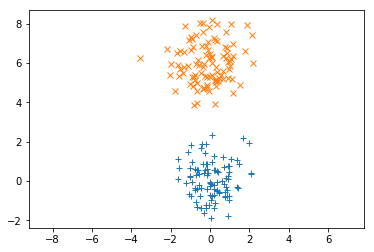

In [3]:
import matplotlib.pyplot as plt
x1 = np.random.randn(100)
y1 = np.random.randn(100) 
x2 = np.random.randn(100)
y2 = np.random.randn(100) + 6
plt.plot(x1, y1, "+", x2, y2, "x")
plt.axis('equal')
plt.show()

#### Scenario 2

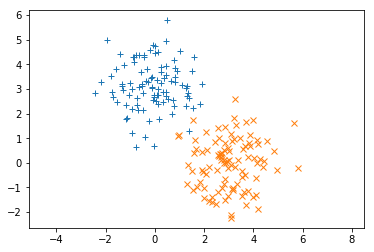

In [4]:
x1 = np.random.randn(100)
y1 = np.random.randn(100) + 3
x2 = np.random.randn(100) + 3
y2 = np.random.randn(100)
plt.plot(x1, y1, "+", x2, y2, "x")
plt.axis('equal')
plt.show()

#### Scenario 3

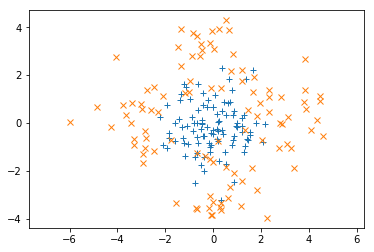

In [5]:
x1 = np.random.randn(100)
y1 = np.random.randn(100) 
x3 = np.random.randn(25) + 3
y3 = np.random.randn(25)
x4 = np.random.randn(25) - 3
y4 = np.random.randn(25)
x5 = np.random.randn(25)
y5 = np.random.randn(25) + 3
x6 = np.random.randn(25) 
y6 = np.random.randn(25) - 3
x3 = np.append(x3 , x5)
y3 = np.append(y3, y5)
x4 = np.append(x4, x6)
y4 = np.append(y4, y6)
x2 = np.append(x3, x4)
y2 = np.append(y3, y4)
#x2 = np.append(x3, x6)
#y2 = np.append(y2 , y6)
plt.plot(x1, y1, "+", x2, y2, "x")
plt.axis('equal')
plt.show()

### Digits classification example


In [24]:
'''Load the dataset from sklearn'''
from sklearn.datasets import load_digits
digits = load_digits()

In [7]:
'''Print the size of the data set'''
print("Data set size: ")
print ("Image Data Shape", digits.data.shape)
print("Label Data Shape", digits.target.shape)

Data set size: 
Image Data Shape (1797, 64)
Label Data Shape (1797,)


In [8]:
import numpy as np
import matplotlib.pyplot as plt

#### Plot the figures

An image is represented by a matirx containing the pixel values of the image. The matrix has the same dimensions as the image. 
A colour image has 3 matrices covering Red, Green and Blue spectrum. A grey scale image has only one matrix with values between 0 and 1. 

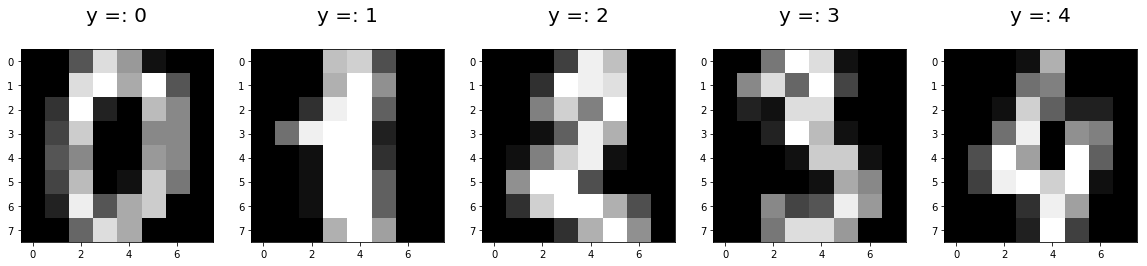

In [10]:
plt.figure(figsize=(20,4))
for index, (image, label) in enumerate(zip(digits.data[0:5], digits.target[0:5])):
    plt.subplot(1, 5, index + 1)
    plt.imshow(np.reshape(image, (8,8)), cmap=plt.cm.gray) # reshaping the image to 8 by 8 and specifying color map to grey scale
    plt.title('y =: %i\n' % label, fontsize = 20)
plt.show()

In [12]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.25, random_state=0)

In [13]:
from sklearn.linear_model import LogisticRegression
classify_digits = LogisticRegression()
classify_digits.fit(x_train, y_train)

/anaconda3/envs/forall/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/envs/forall/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

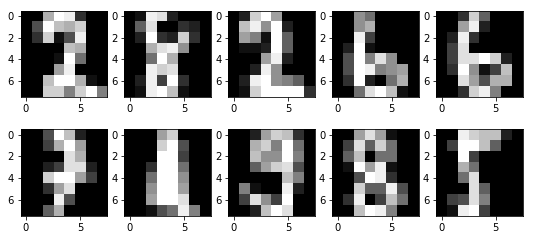

In [14]:
'''Plot first 10 test images'''
plt.figure(figsize=(9,4))
for index, (image, label) in enumerate(zip(x_test[0:10], y_test[0:10])):
    plt.subplot(2, 5, index + 1)
    plt.imshow(np.reshape(image, (8,8)), cmap=plt.cm.gray) 
plt.show()

In [22]:
'''Predict first test image'''  
classify_digits.predict(x_test[0].reshape(1,-1))

array([2])

In [15]:
'''Predict the first 10 test images''' 
classify_digits.predict(x_test[0:10])

array([2, 8, 2, 6, 6, 7, 1, 9, 8, 5])

In [16]:
'''Complete predicting the whole test set'''
predictions = classify_digits.predict(x_test)

In [17]:
'''Score the prediction'''
score = classify_digits.score(x_test, y_test)
print("score = ", score)

score =  0.9533333333333334
